### M Kevin Alrahmanto

## TEACHER: Mike X Cohen, sincxpress.com

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd

## 1. Mean

In [6]:
std_mean=np.array([[1,5,10],
                  [3,3,3]])

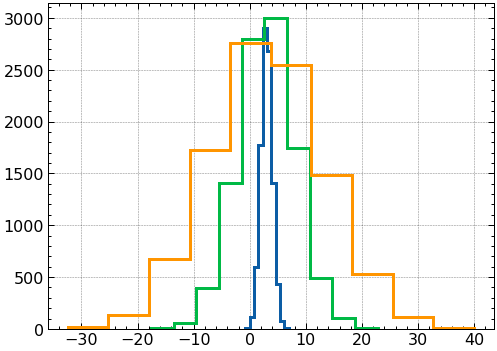

In [7]:
for i in range(std_mean.shape[1]):
    plt.hist(np.random.randn(10000)*std_mean[0][i] + std_mean[1][i], histtype='step', lw=3)
plt.show()

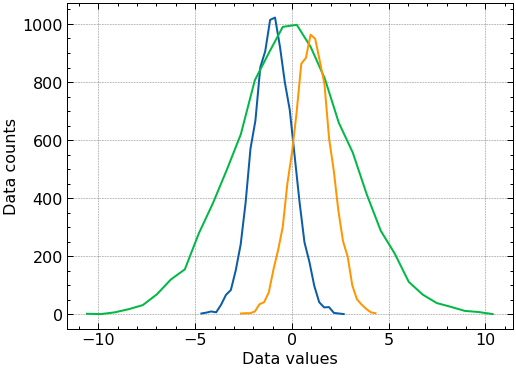

In [8]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1 #shift to the left
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1 #shift to the right

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

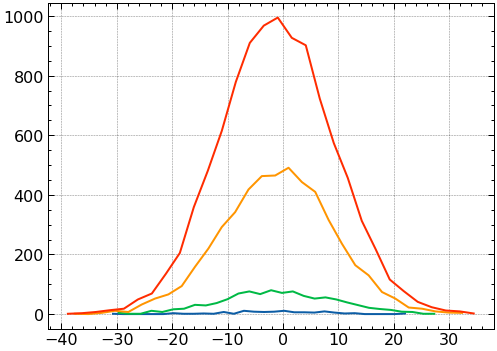

In [9]:
for i in [100, 1000, 5000, 10000]:
    data=np.random.randn(i)*10 -1
    y,x=np.histogram(data, bins=30)
    x=(x[:-1]+x[1:])/2
    plt.plot(x,y)

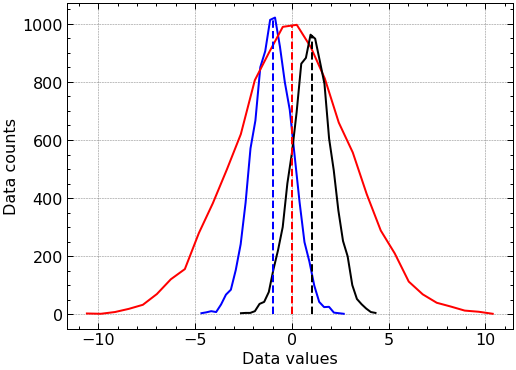

In [10]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--') #[x1, x2] [y1, y2]
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

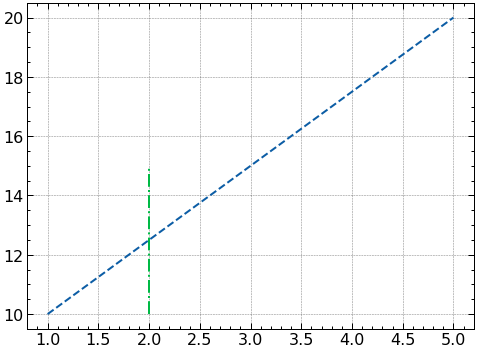

In [11]:
plt.plot([1,5], [10, 20], ls='--')
plt.plot([2,2], [10, 15], ls='-.')
plt.show()

## 2. Failure of the mean

In [12]:
data=np.hstack([np.random.randn(1000)-2, np.random.randn(1000)+2])
len(data)

2000

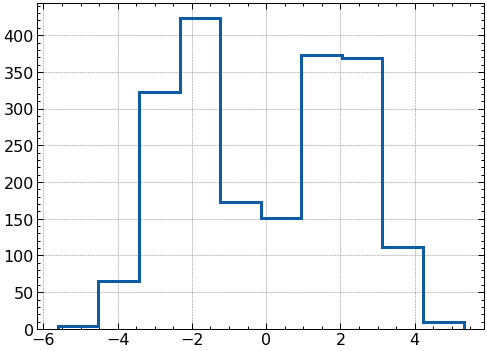

In [13]:
plt.hist(data, histtype='step', lw=3)
plt.show()

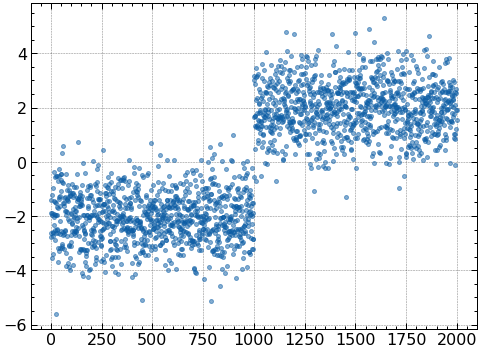

In [14]:
plt.plot(data, '.', alpha=0.5, markersize=8 )

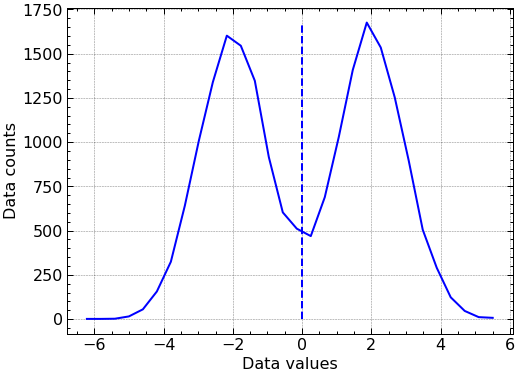

In [15]:
## "failure" of the mean

# new dataset of distribution combinations
d4 = np.hstack( (np.random.randn(N)-2,np.random.randn(N)+2) )
# and its histogram
[y4,x4] = np.histogram(d4,nbins)
x4 = (x4[:-1]+x4[1:])/2

# and its mean
mean_d4 = np.mean(d4)


plt.plot(x4,y4,'b')
plt.plot([mean_d4,mean_d4],[0,max(y4)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

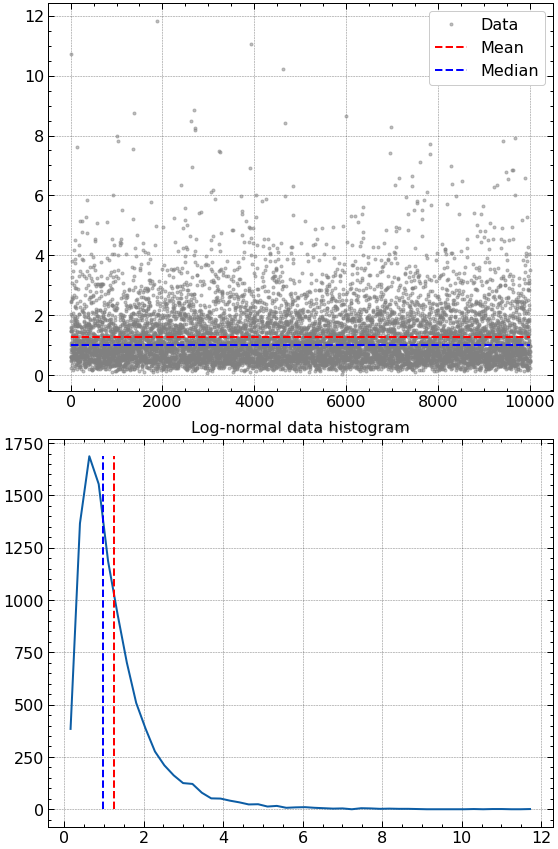

In [16]:
## median

# create a log-normal distribution
shift   = 0
stretch = .7
n       = 10000
nbins   = 50

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data ) # Lognormal

# and its histogram
y,x = np.histogram(data,nbins)
x = (x[:-1]+x[1:])/2

# compute mean and median
datamean = np.mean(data)
datamedian = np.median(data)


# plot data
fig,ax = plt.subplots(2,1,figsize=(8,12))
ax[0].plot(data,'.',color=[.5,.5,.5],label='Data', alpha=0.5)
ax[0].plot([1,n],[datamean,datamean],'r--',label='Mean')
ax[0].plot([1,n],[datamedian,datamedian],'b--',label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean,datamean],[0,max(y)],'r--')
ax[1].plot([datamedian,datamedian],[0,max(y)],'b--')
ax[1].set_title('Log-normal data histogram')

plt.tight_layout()
plt.show()

## 3. Standard Deviation STD

In [17]:
N = 10000
nbins=100
d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1
mean_d1=np.mean(d1)
mean_d2=np.mean(d2)
mean_d3=np.mean(d3)
# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2

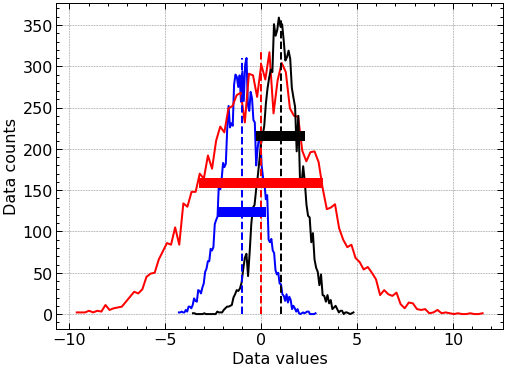

In [18]:
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)


# same plot as earlier
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--', [mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now add stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

## 4. Mode

In [19]:
data = np.round(np.random.randn(100))
uniq_data = np.unique(data)
for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {sum(data==uniq_data[i])} times.')

print(' ')
print('The modal value is %g'%stats.mode(data)[0][0])

-2.0 appears 6 times.
-1.0 appears 25 times.
-0.0 appears 31 times.
1.0 appears 31 times.
2.0 appears 7 times.
 
The modal value is -0


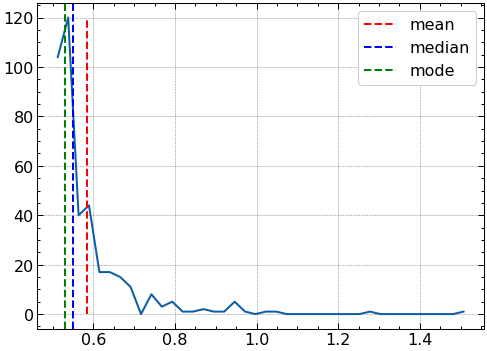

In [20]:
sample=np.round((np.exp(np.random.randn(400))*0.05+0.5),2)
stats.mode(sample)
y, x=np.histogram(sample, 40)
x1=(x[1:]+x[:-1])/2 
xbar=np.mean(sample)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
plt.plot(x1,y)
plt.plot([xbar, xbar], [0,max(y)], c='r', ls='--', label='mean')
plt.axvline(np.median(sample), c='b', ls='--', label='median') 
plt.axvline(stats.mode(sample)[0][0], c='g', ls='--', label='mode')
plt.legend();   

## 5. Poisson

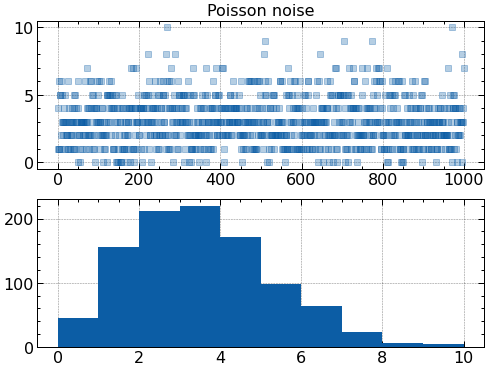

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,1000)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s', alpha=0.3)
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()
np.unique(data)

In [22]:
for i in np.unique(data):
    print(i,sum(data==i))

0 45
1 156
2 212
3 220
4 171
5 98
6 64
7 23
8 6
9 3
10 2


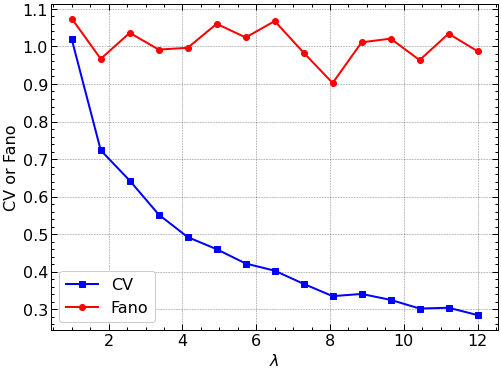

In [23]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()

# 6. Error Bar

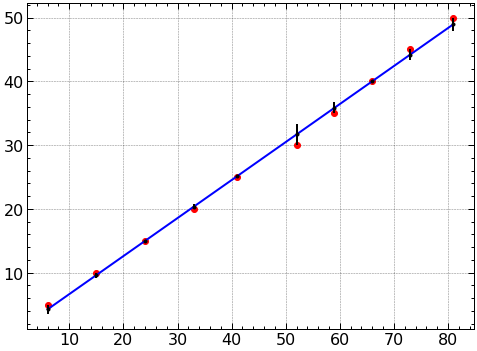

In [24]:
x=np.array([6,15, 24,33,41,52,59,66,73,81])
y=np.array([5,10,15,20,25,30,35,40,45,50])
coef=np.polyfit(x,y,1)
poly1d_fn=np.poly1d(coef)

plt.plot(x,y,'ro',x,poly1d_fn(x),'-b')
plt.errorbar(x,poly1d_fn(x),yerr=poly1d_fn(x)-y, fmt='.k')
plt.show()

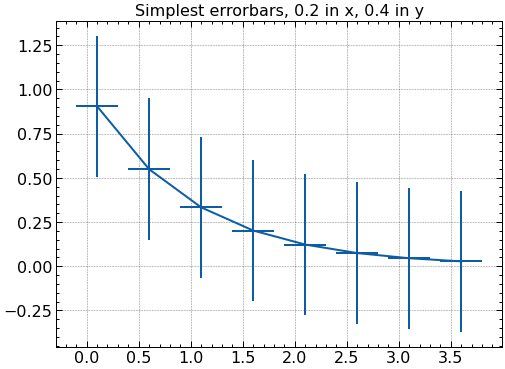

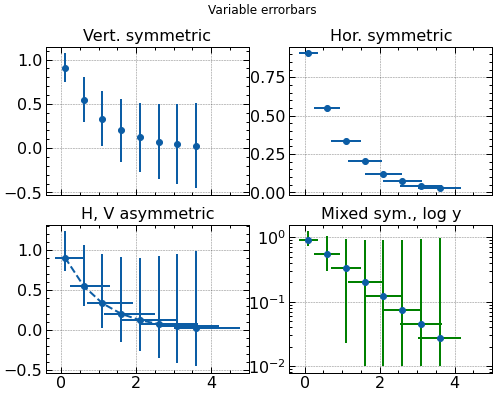

In [25]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()

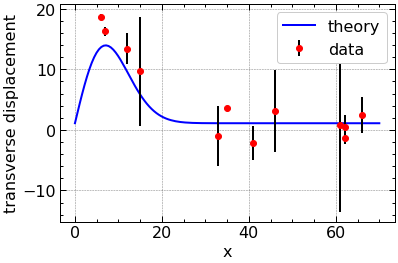

In [26]:
# simualated_data
xdata = np.sort(np.random.randint(1, 70, (12)))
ydata = (1.4+ 3.0*xdata*np.exp(-(xdata/10.0)**2)) + np.random.randn(len(xdata))*2
yerror = np.random.randn(len(xdata))*5

# create theoretical fitting curve
x = np.linspace(0, 70, 128)
y = 1.1+ 3.0*x*np.exp(-(x/10.0)**2)

# create plot
plt.figure(1, figsize = (6,4) )
plt.plot(x, y, 'b-', label="theory")
plt.errorbar(xdata, ydata, fmt='ro', label="data",
              yerr=yerror, ecolor='black')
plt.xlabel('x')
plt.ylabel('transverse displacement')
plt.legend(loc='upper right')

# display plot on screen
plt.show()

In [27]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

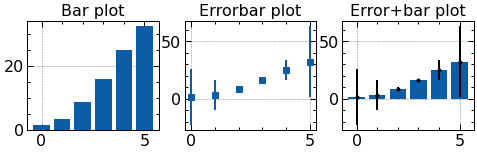

In [28]:
# show the bars!

fig,ax = plt.subplots(1,3,figsize=(8,2))

# 'naked' bars
ax[0].bar(range(n),np.mean(data,axis=0))
ax[0].set_title('Bar plot')

# just the error bars
ax[1].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='s',linestyle='')
ax[1].set_title('Errorbar plot')

# both
ax[2].bar(range(n),np.mean(data,axis=0))
ax[2].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
ax[2].set_title('Error+bar plot')

plt.show()

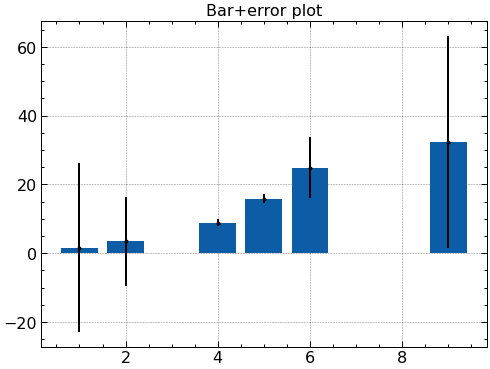

In [29]:
## manually specify x-axis coordinates

xcrossings = [ 1, 2, 4, 5, 6, 9 ]

plt.bar(xcrossings,np.mean(data,axis=0))
plt.errorbar(xcrossings,np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
plt.title('Bar+error plot')

plt.show()

# 7. Entropy

In [30]:
x=np.ceil(np.random.randn(100)*3)
unique=np.unique(x)
prob=np.zeros((2,len(np.unique(x))))

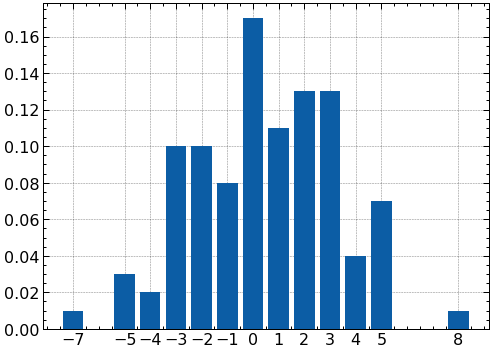

In [31]:
for i in range(len(unique)):
    prob[:,i]=[unique[i], sum(x==unique[i])/len(x)]
plt.bar(prob[0], prob[1])
plt.xticks(unique)
plt.show()

In [32]:
entropee = -sum( prob[1]*np.log2(prob[1]+np.finfo(float).eps) )

In [33]:
entropee

3.357886363452237

In [34]:
np.sum(prob[1])

1.0

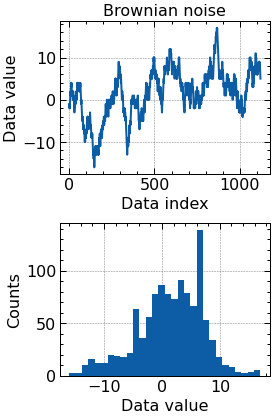

In [35]:
N = 1123
brownnoise = np.cumsum( np.sign(np.random.randn(N)) )

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(brownnoise)
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')
ax[0].set_title('Brownian noise')

ax[1].hist(brownnoise,30)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Counts')
plt.tight_layout()
plt.show()

In [37]:
df=pd.concat([pd.DataFrame(brownnoise),pd.DataFrame(brownnoise).rolling(90).mean(),
          pd.DataFrame(brownnoise).rolling(40).mean()], axis=1)
df.columns=['price','slow', 'fast']

In [38]:
ind=df[(np.abs(df['slow']-df['fast'])>=0) & (np.abs(df['slow']-df['fast'])<0.09)].index

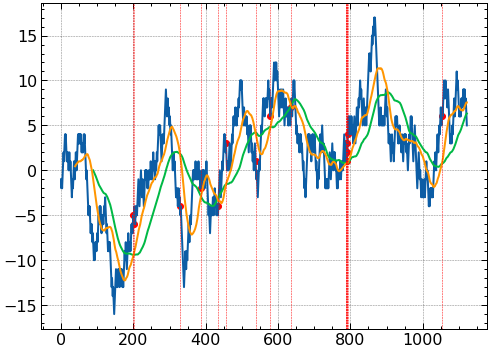

In [39]:
plt.plot(df['price'])
plt.plot(df['slow'])
plt.plot(df['fast'])
plt.scatter(ind,brownnoise[ind], color='red')
for i in ind:
    plt.axvline(i, ls='--', color='r', lw=0.5)

In [40]:
data3=np.exp(np.random.randn(100))
bins=np.arange(4,42)
collect_entropy=np.zeros(len(bins))
for i in range(len(bins)):
    y,x=np.histogram(data3,bins[i])
    probs=y/sum(y)
    collect_entropy[i]=-sum( probs*np.log2(probs+ np.finfo(float).eps))

Text(0.5, 0, 'Bins')

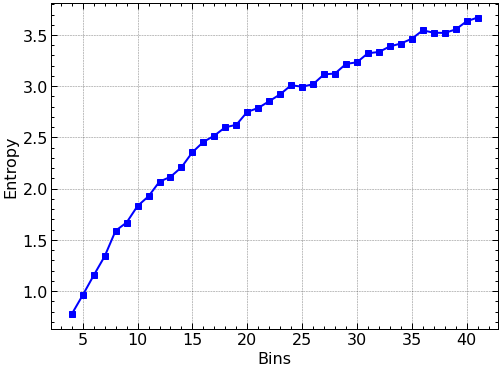

In [41]:
plt.plot(bins,collect_entropy, 'bs-')
plt.ylabel('Entropy')
plt.xlabel('Bins')

In [42]:
y,x=np.histogram(data3,bins[20])

In [43]:
y

array([23, 26, 14, 13,  6,  3,  3,  3,  2,  2,  1,  0,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  2], dtype=int64)

# 8. Box-and-whisker plots

In [44]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

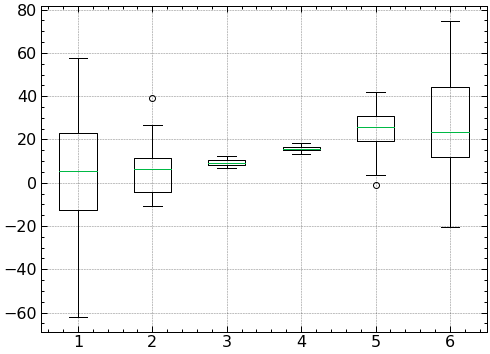

In [45]:
# now for the boxplot
plt.boxplot(data)
plt.show()

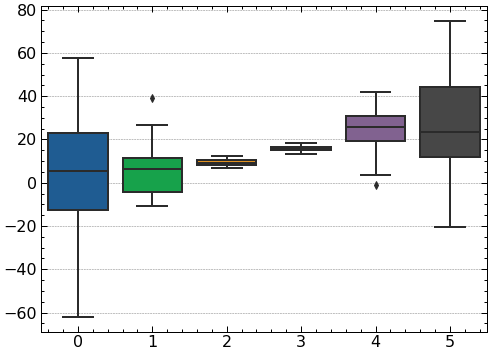

In [46]:
# now with seaborn
sns.boxplot(data=data,orient='v')
plt.show()

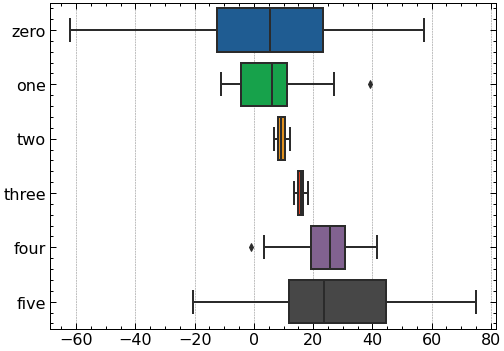

In [47]:
# or as a pandas data frame
df = pd.DataFrame(data,columns=['zero','one','two','three','four','five'])
sns.boxplot(data=df,orient='h')
plt.show()

# 9. Violin

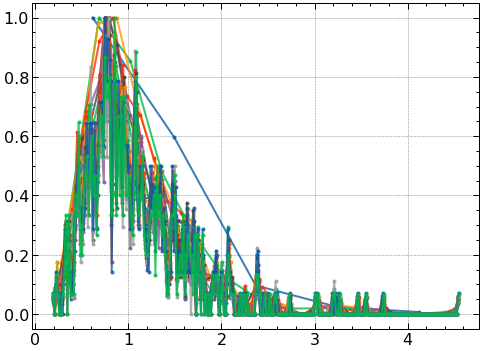

In [48]:
n=500
data=np.exp(np.random.randn(n)/2)
bins2try= np.round(np.linspace(5, n/2, 30))
for bini in range(len(bins2try)):
    y,x=np.histogram(data, int(bins2try[bini]))
    x1=(x[1:]+x[:-1])/2
    y=y/np.max(y)
    plt.plot(x1,y, '.-',alpha=0.8)

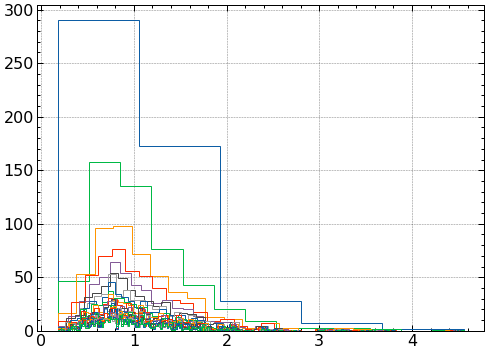

In [49]:
for bini in range(len(bins2try)):
    plt.hist(data,histtype='step', bins=int(bins2try[bini]))

<AxesSubplot:>

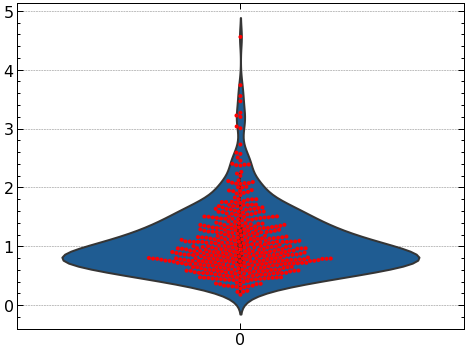

In [50]:
import seaborn as sns
sns.violinplot(data=data,orient='v',size=4, alpha=0.5)
sns.swarmplot(data=data,orient='v',size=4, color='red')


# 10. Barplot

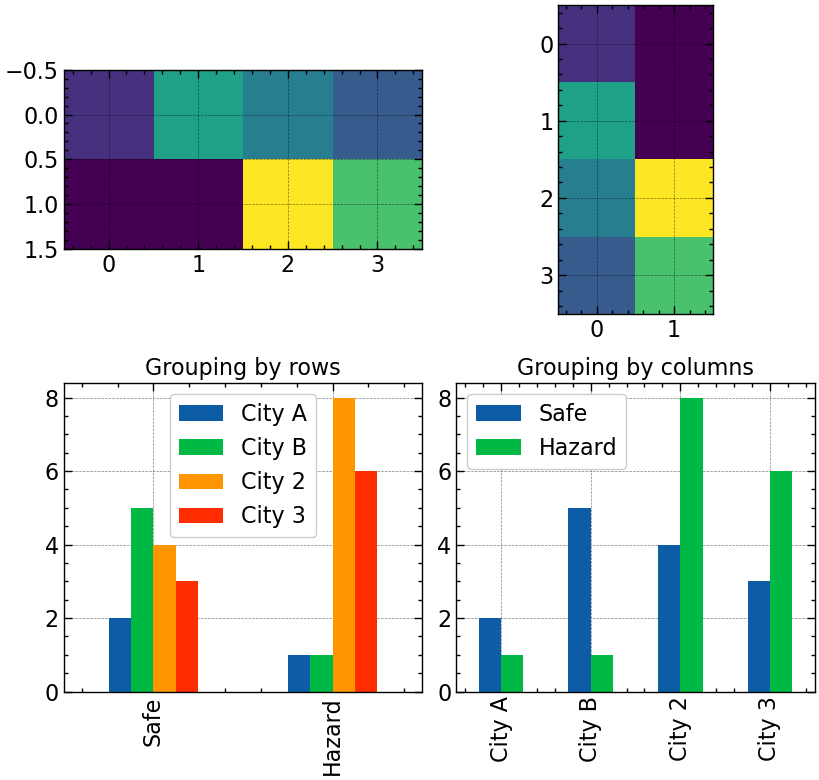

In [51]:
## note about bars from matrices

# data are groups (rows) X property (columns)
m = [ [2,5,4,3], [1,1,8,6] ]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8), dpi=100)

# conceptualizing the data as <row> groups of <columns>
ax[0,0].imshow(m)

# using pandas dataframe
df = pd.DataFrame(m,index=['Safe', 'Hazard'],columns=['City A','City B','City 2','City 3'])
df.plot(ax=ax[1,0],kind='bar')
ax[1,0].set_title('Grouping by rows')


# now other orientation (property X group)
ax[0,1].imshow(np.array(m).T)
df.T.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Grouping by columns')

plt.tight_layout()
plt.show()